In [2]:
import math
import numpy as np
import scipy.io.wavfile
import librosa
import matplotlib.pyplot as plt

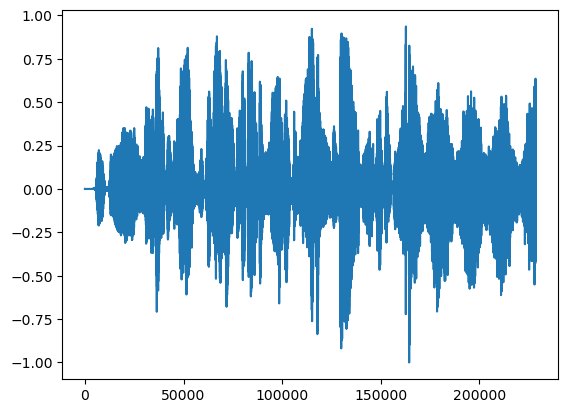

In [23]:
def generate_sinusoid(sampling_rate, frequency, duration):
  sampling_interval = 1.0 / sampling_rate
  t = np.arange(sampling_rate * duration) * sampling_interval
  waveform = np.sin(2.0 * math.pi * frequency * t)
  return waveform

def tremolo(waveform, sampling_rate, frequency, depth):
  tremolo_waveform = generate_sinusoid(sampling_rate, frequency, len(waveform) / sampling_rate)
  changed = waveform * (1.0 + depth * tremolo_waveform)
  return changed / np.max(np.abs(changed))

def export_wav(filename, sampling_rate, waveform):
  waveform = np.int16(waveform * 32767.0)
  scipy.io.wavfile.write(filename, sampling_rate, waveform)

SR = 16000
filename = 'rori'
x, _ = librosa.load(f'audio/{filename}.wav', sr=SR)
FREQ = 1
SIZE_FRAME = 2048
SHIFT_SIZE = 16000 / 100  # 10 msec
DEPTH = 0.5
x_changed = tremolo(x, SR, FREQ, DEPTH)
fig = plt.figure()
plt.plot(x_changed)
fig.savefig(f'plot/tremolo/{filename}-{FREQ}-{int(DEPTH * 10)}.png')
export_wav(f'audio/tremolo/{filename}-{FREQ}-{int(DEPTH * 10)}.wav', SR, x_changed)